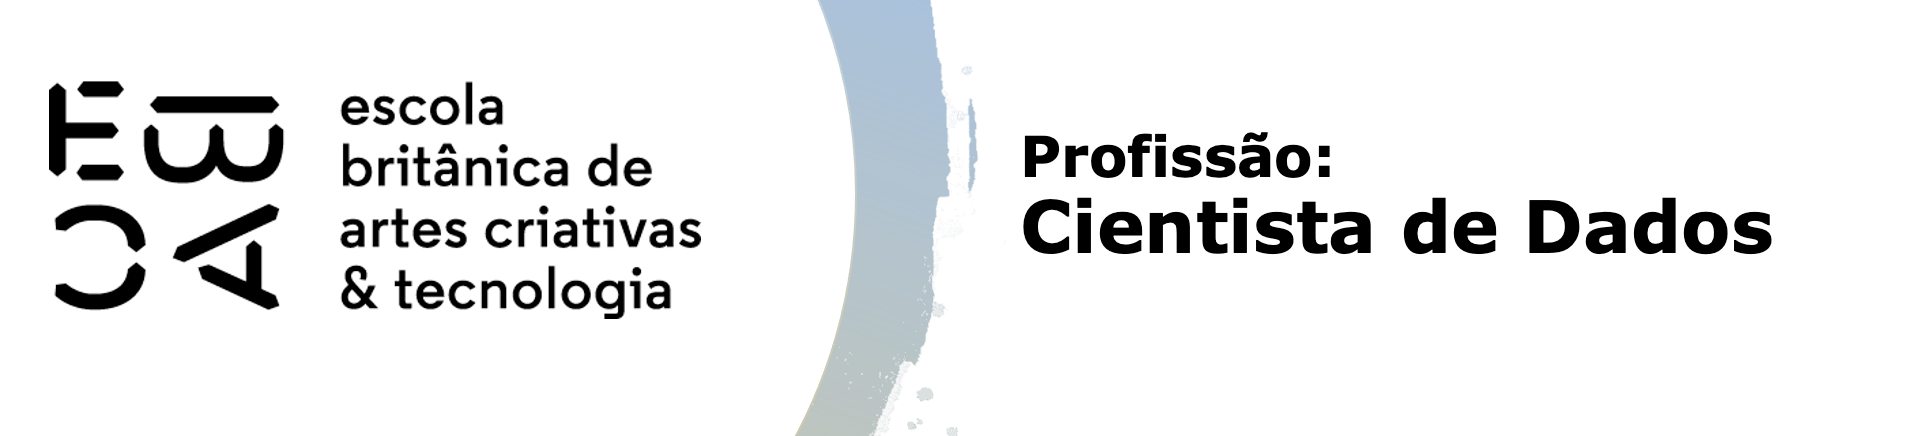

# Tarefa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from statsmodels.stats.weightstats import ttest_ind

In [2]:
pg = sns.load_dataset('penguins')

In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

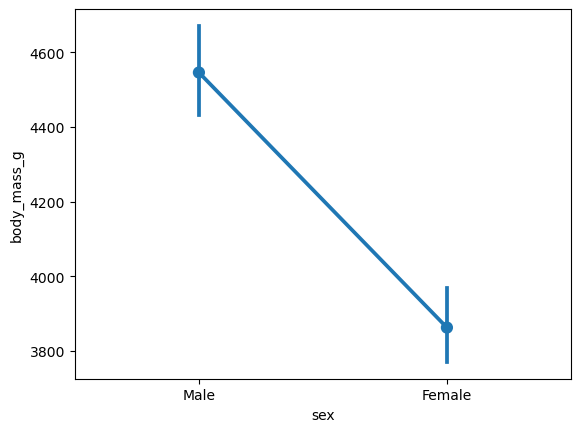

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [5]:
pg_clean = pg.dropna(subset=['sex', 'body_mass_g'])

peso_macho = pg_clean[pg_clean['sex'] == 'Male']['body_mass_g']
peso_femea = pg_clean[pg_clean['sex'] == 'Female']['body_mass_g']

t_stat, p_value = stats.ttest_ind(peso_macho, peso_femea, equal_var=False)

n1, n2 = len(peso_macho), len(peso_femea)
v1, v2 = np.var(peso_macho, ddof=1), np.var(peso_femea, ddof=1)
df = (v1/n1 + v2/n2)**2 / ((v1/n1)**2/(n1-1) + (v2/n2)**2/(n2-1))

print(f'Teste-T: {t_stat}')
print(f'P-value: {p_value:.18f}')
print(f'Graus de liberdade: {df:.18f}')

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula. Há diferença significativa de peso entre machos e fêmeas.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente de diferença significativa de peso entre machos e fêmeas.")

Teste-T: 8.554537231165762
P-value: 0.000000000000000479
Graus de liberdade: 323.895881028648432221
Rejeitamos a hipótese nula. Há diferença significativa de peso entre machos e fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

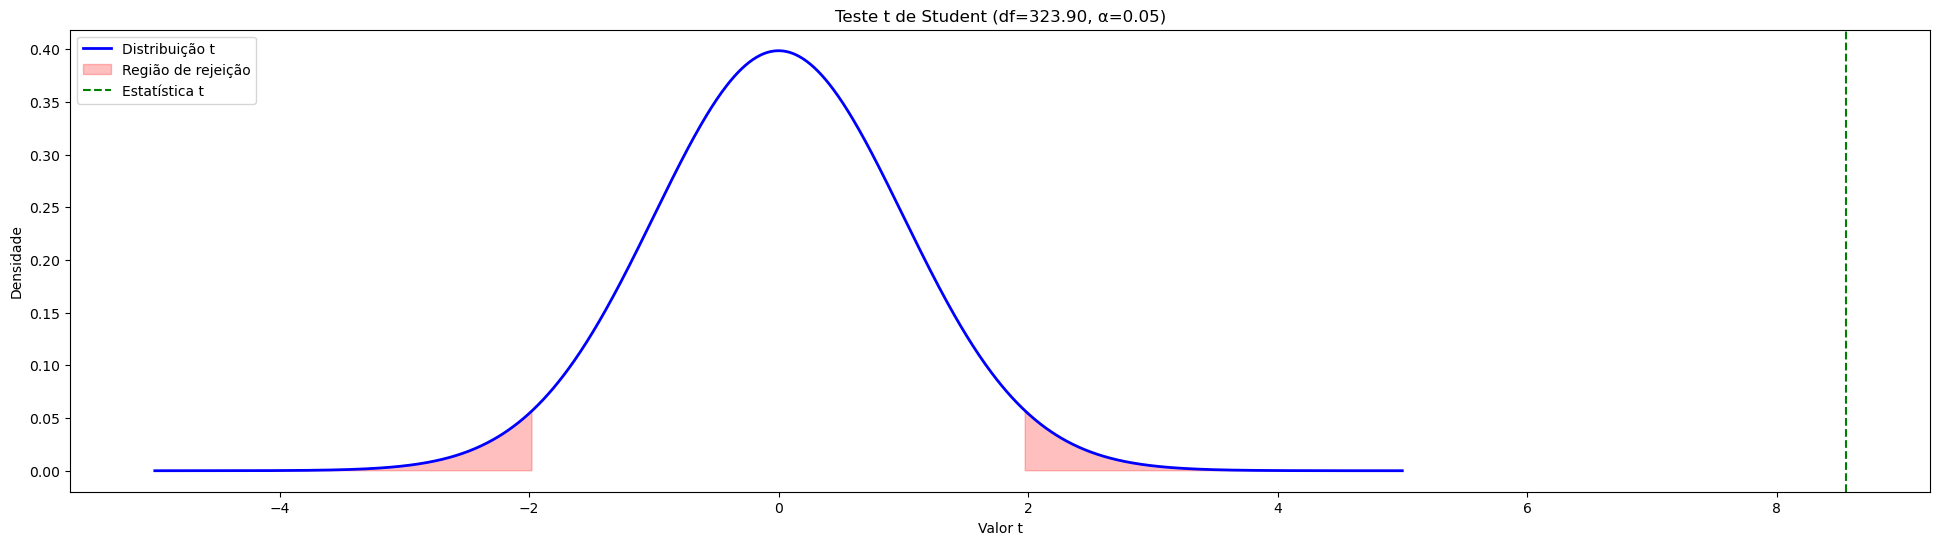

In [6]:
def plot_t_test(t_stat, df, alpha=0.05):
    fig, ax = plt.subplots(figsize=(24, 6))
    
    x = np.linspace(-5, 5, 1000)
    y = stats.t.pdf(x, df)
    
    ax.plot(x, y, 'b-', lw=2, label='Distribuição t')
    
    t_crit = stats.t.ppf([alpha/2, 1-alpha/2], df)
    
    ax.fill_between(x, 0, y, where=(x <= t_crit[0]) | (x >= t_crit[1]), color='red', alpha=0.25, label='Região de rejeição')
    
    ax.axvline(t_stat, color='g', linestyle='--', label='Estatística t')
    
    ax.set_xlabel('Valor t')
    ax.set_ylabel('Densidade')
    ax.set_title(f'Teste t de Student (df={df:.2f}, α={alpha})')
    
    ax.legend()
    
    plt.show()

plot_t_test(t_stat, df)

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [8]:
def test_species(species):
    species_data = pg[pg['species'] == species].dropna(subset=['sex', 'body_mass_g'])
    peso_machos = species_data[species_data['sex'] == 'Male']['body_mass_g']
    peso_femeas = species_data[species_data['sex'] == 'Female']['body_mass_g']
    t_stat, p_value = stats.ttest_ind(peso_machos, peso_femeas, equal_var=False)
    return t_stat, p_value

species_list = pg['species'].unique()
for species in species_list:
    t_stat, p_value = test_species(species)
    print(f"Espécie: {species}")
    print(f"Estatística T: {t_stat}")
    print(f"P-value: {p_value:.25f}")
    print("---")


Espécie: Adelie
Estatística T: 13.126285923485874
P-value: 0.0000000000000000000000001
---
Espécie: Chinstrap
Estatística T: 5.20773384899266
P-value: 0.0000022644315514651401720
---
Espécie: Gentoo
Estatística T: 14.761368414543291
P-value: 0.0000000000000000000000000
---
